In [21]:


# Load and Explore the Dataset


import pandas as pd

# Load dataset
df = pd.read_csv("Bank Churn Modelling.csv")

# Display basic information
print(df.info())

# Check missing values
print(df.isnull().sum())

# Preview first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age    

         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  \
count     10000.000000      10000.00000      10000.000000      10000.000000   
mean          1.530200          0.70550          0.515100     100090.239881   
std           0.581654          0.45584   

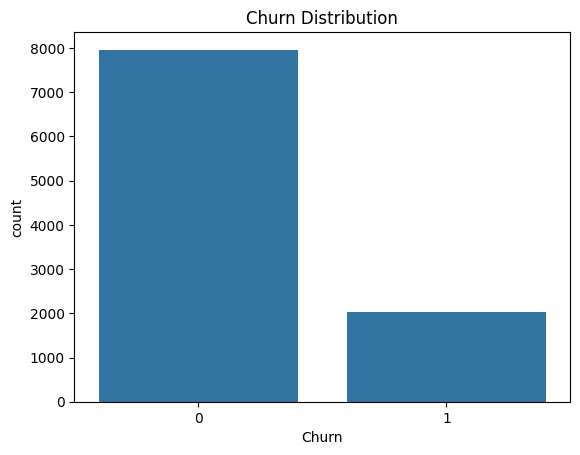

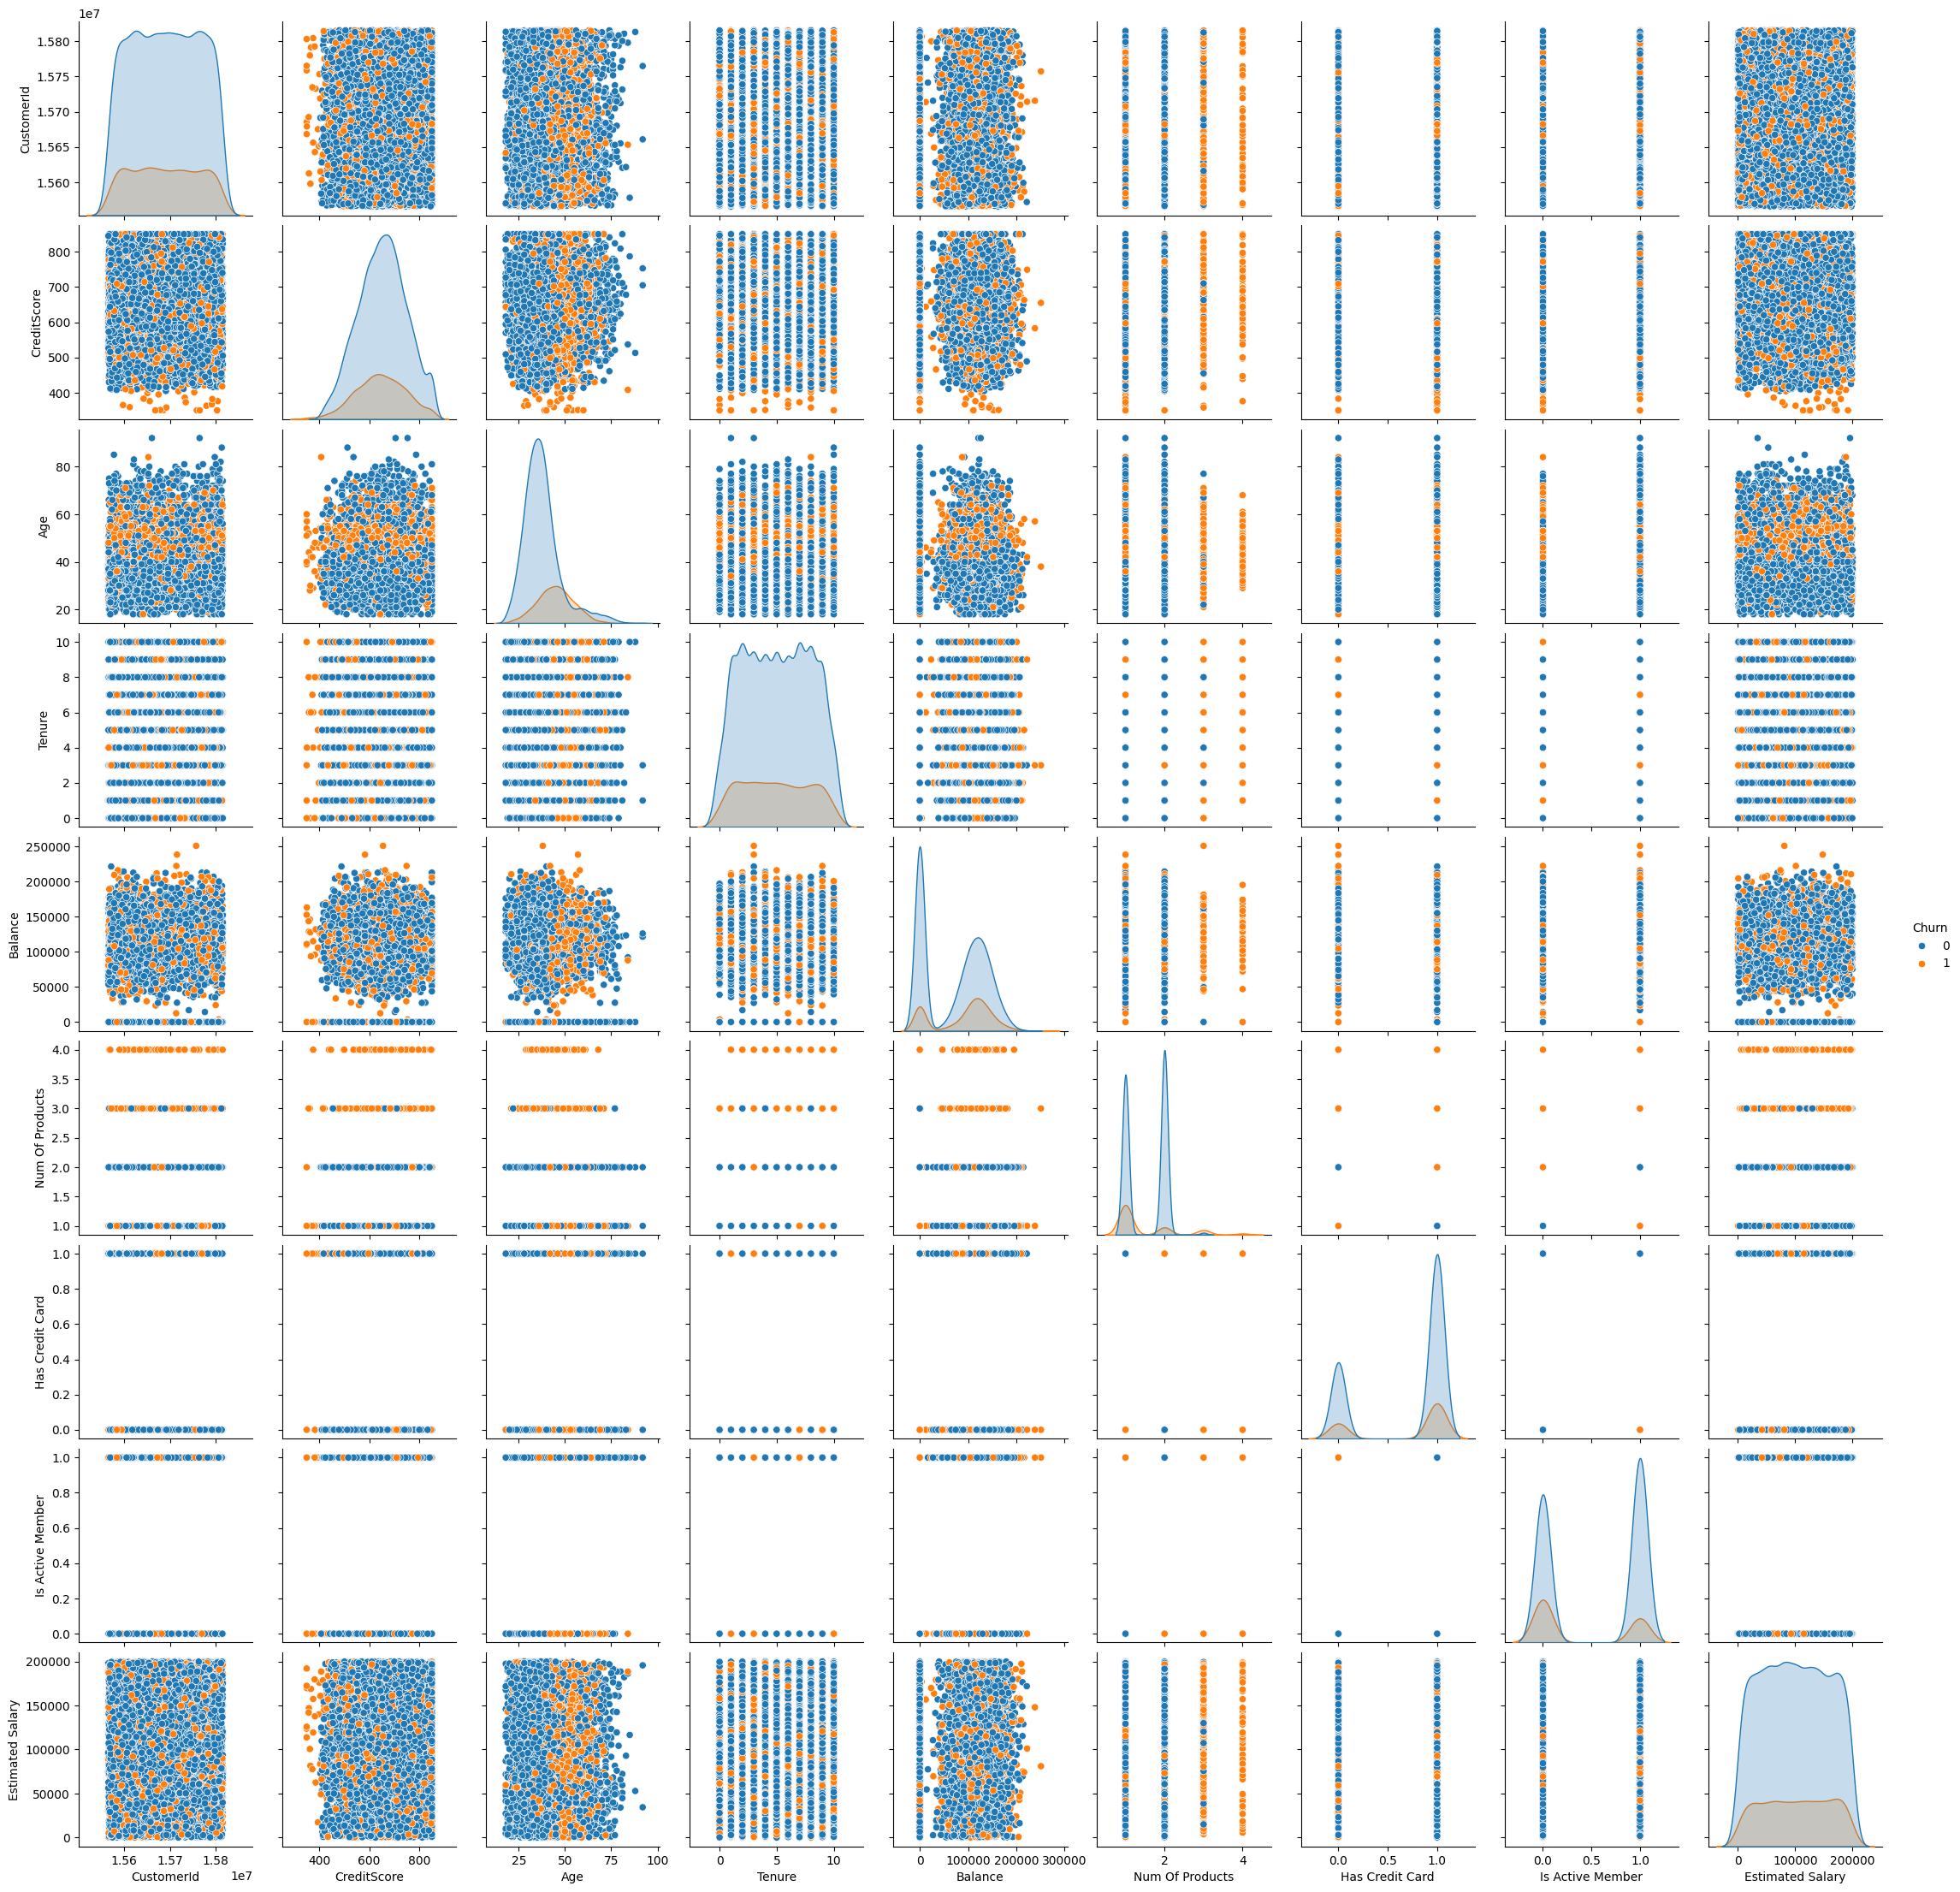

ValueError: could not convert string to float: 'Hargrave'

<Figure size 1000x600 with 0 Axes>

In [5]:
# Perform Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

# Churn distribution
sns.countplot(x="Churn", data=df)
plt.title(" Bank Churn Distribution")
plt.show()

# Pairplot for numerical features
sns.pairplot(df, hue="Churn")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [14]:
#Feature Engineering & Preprocessing


from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Scale numerical features
scaler = StandardScaler()
df[["CreditScore", "Balance", "Estimated Salary"]] = scaler.fit_transform(df[["CreditScore", "Balance", "Estimated Salary"]])

print(df.head())


   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure   Balance  \
0    15634602  Hargrave    -0.326221    France       0   42       2 -1.225848   
1    15647311      Hill    -0.440036     Spain       0   41       1  0.117350   
2    15619304      Onio    -1.536794    France       0   42       8  1.333053   
3    15701354      Boni     0.501521    France       0   39       1 -1.225848   
4    15737888  Mitchell     2.063884     Spain       0   43       2  0.785728   

   Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  Churn  
0                1                1                 1          0.021886      1  
1                1                0                 1          0.216534      0  
2                3                1                 0          0.240687      1  
3                2                0                 0         -0.108918      0  
4                1                1                 1         -0.365276      0  


In [13]:
print(df.columns)


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

